In [479]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [530]:
imgsize = 30
realbee = np.array([1,5.0,0.5,0]);
def genimage(realpos):
    """Returns the difference of images or whatever.
    This is just a simple synthetic demonstration of the idea"""
    img = np.random.randn(imgsize,imgsize)*1
    img[int(realpos[0]),int(realpos[1])]+=4
    return img


In [536]:
from scipy.stats import norm
def get_p_img_given_particle(img,particle):
    """p(pixelvalue|particlebeingthere)=N(4,2)
    """
    return norm.pdf(img[int(particle[0]),int(particle[1])],4,1)
    #pixelbrightness = img[int(particle[0]),int(particle[1])]-np.mean(img)
    #return 1/(1+np.exp(-pixelbrightness)) #feed through a logisitc



In [537]:
def plot_current_state(img,particles,w=None):
    plt.imshow(img,cmap='gray')
    plt.clim([-10,10])
    plt.colorbar()
    if w is not None:
        scaledw=300*w/np.sum(w)
        plt.scatter(particles[::1,1]-0.5,particles[::1,0]-0.5,scaledw[::1],color='yellow',alpha=0.2)
    else:
        plt.scatter(particles[::1,1]-0.5,particles[::1,0]-0.5,100,color='yellow',alpha=0.01)

In [538]:
N = 50000
particles = np.random.rand(N,4)
particles[:,:2] *= imgsize
particles[:,2:] *= 1.0

In [539]:
particles[0,:]

array([16.682911  , 12.96047499,  0.46274625,  0.54761202])

[15.54168564 15.14357993  0.50689947  0.49479011] [6.5 5.  0.5 0. ]
[13.86097713 12.24201358  0.49572786  0.49179205] [7.  5.  0.5 0. ]
[8.0139817  6.42189128 0.49381539 0.51621642] [7.5 5.  0.5 0. ]
[8.97616983 6.75585158 0.50947102 0.46164638] [8.  5.  0.5 0. ]
[8.28456735 5.47565672 0.51781882 0.4544436 ] [8.5 5.  0.5 0. ]
[8.38049156 5.48005356 0.51928428 0.4567288 ] [9.  5.  0.5 0. ]
[9.13111153 5.48075752 0.52103817 0.44695417] [9.5 5.  0.5 0. ]
[9.44775973 5.47205773 0.52749543 0.44257488] [10.   5.   0.5  0. ]
[10.24410439  5.52186821  0.55556368  0.39300935] [10.5  5.   0.5  0. ]
[10.73363183  5.49697068  0.56379452  0.40965741] [11.   5.   0.5  0. ]


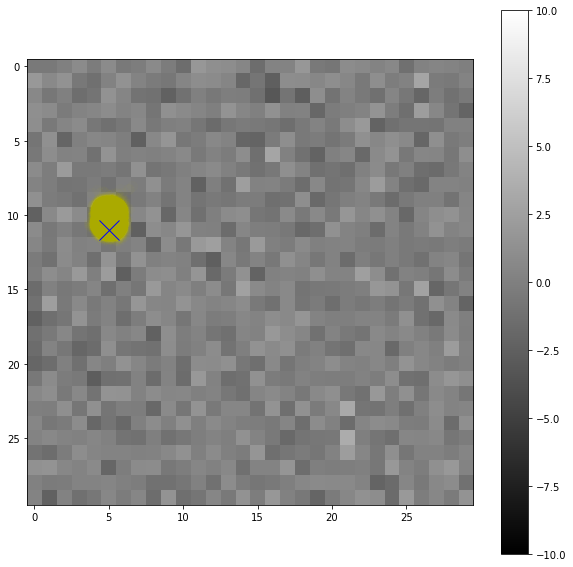

In [540]:
for it in range(10):
    realbee[0:2]+=realbee[2:4]
    #compute probabilities p(image|particle) for all the particles
    img = genimage(realbee)
    p = [get_p_img_given_particle(img,particle) for particle in particles]
    w = p/np.sum(p) #normalise the weights
    #plot_current_state(img,particles,w)

    #resample
    particles = particles[np.random.choice(len(particles),N,p=w),:]

    #compute p(bee_{i+1}|bee_{i}) = N(,.,)
    print(np.mean(particles,0),realbee)
    particles[:,:2]+=np.random.randn(N,2)*0.25
    particles[:,2:]+=np.random.randn(N,2)*0.05
    keep = (particles[:,0]<imgsize) & (particles[:,1]<imgsize) & (particles[:,0]>=0) & (particles[:,1]>=0)
    particles=particles[keep,:]

plt.figure(figsize=[10,10])
plot_current_state(img,particles)
plt.plot(realbee[1],realbee[0],'xb',markersize=20)


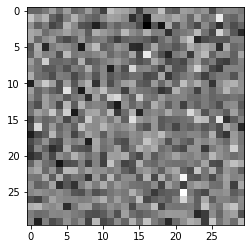

In [542]:
plt.imshow(img,cmap='gray')

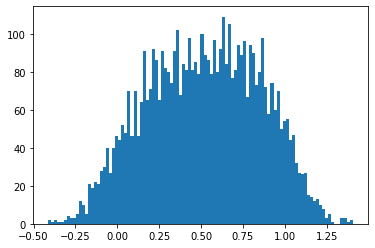

In [524]:
plt.hist(particles[:,3],100);

In [525]:
realbee

array([21. ,  5. ,  0.5,  0. ])

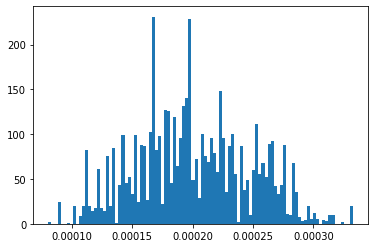

In [526]:
plt.hist(w,100);

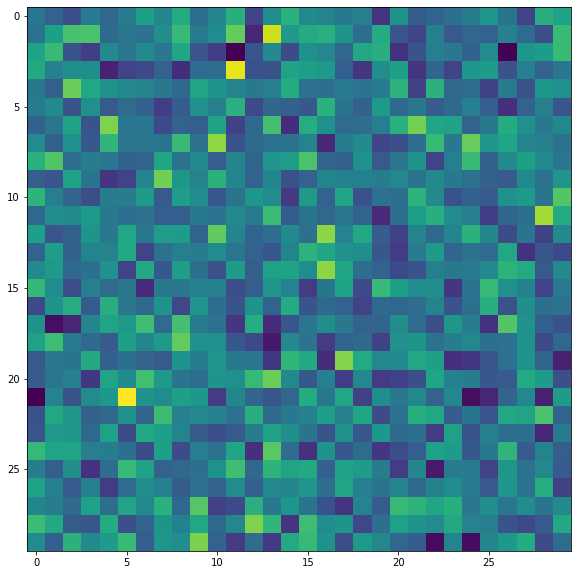

In [527]:
plt.figure(figsize=[10,10])
plt.imshow(img)

In [528]:
realbee

array([21. ,  5. ,  0.5,  0. ])

In [380]:
np.mean(particles,0)

array([25.02290639, 25.05905899,  0.50788982,  0.49311589])

In [267]:
realbee

array([1.  , 5.  , 0.25, 0.  ])

In [242]:
np.max(particles,0)



















array([19.96556544, 19.95322161,  1.05530399,  0.96173746])